# Regression Exercises

## Linear

In [1]:
# Loading data
import numpy as np
from matplotlib import pyplot as plt

# Read data from GitHub
data_url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/portland_housing.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this dataset are defined as follows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial and first find the best linear fit for floor area (sqft) vs. valued price (USD). Recall that setting the derivative = 0 and solving for $b$ & $m$ produces the formula for the best fit trend:

### $$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
### $$ b = y_{mean}-m*x_{mean} $$

In [7]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    m = np.sum(np.multiply(xx - xx.mean(), yy - yy.mean())) / np.sum(np.square(xx - xx.mean()))
    b = yy.mean() - m*xx.mean()
    return m, b
    # YOUR CODE HERE

In [8]:
x_sqft - x_sqft.mean()

array([ 1.03319149e+02, -4.00680851e+02,  3.99319149e+02, -5.84680851e+02,
        9.99319149e+02, -1.56808511e+01, -4.66680851e+02, -5.73680851e+02,
       -6.20680851e+02, -5.06680851e+02, -6.06808511e+01, -6.80851064e-01,
       -1.10680851e+02,  2.47731915e+03, -7.32680851e+02,  2.99319149e+02,
       -6.80680851e+02, -7.64680851e+02,  6.08319149e+02,  1.03031915e+03,
       -2.33680851e+02, -1.12680851e+02, -3.96680851e+02, -3.86808511e+01,
        1.88931915e+03, -9.00680851e+02, -5.42680851e+02,  5.25319149e+02,
        1.99319149e+02,  6.36319149e+02, -1.61680851e+02, -1.00068085e+03,
        3.93191489e+01,  1.13631915e+03, -1.89680851e+02, -5.63680851e+02,
       -7.61680851e+02,  1.31319149e+02,  2.21431915e+03,  1.61319149e+02,
       -3.36680851e+02,  2.37319149e+02,  5.66319149e+02, -8.00680851e+02,
       -1.14868085e+03, -1.48680851e+02, -7.97680851e+02])

In [9]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now that we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since it's just an equation, we need to _sample_ the curve in order to plot it.

To do this, we'll find the difference between the largest and smallest floor area and divide it into 100 sample points.

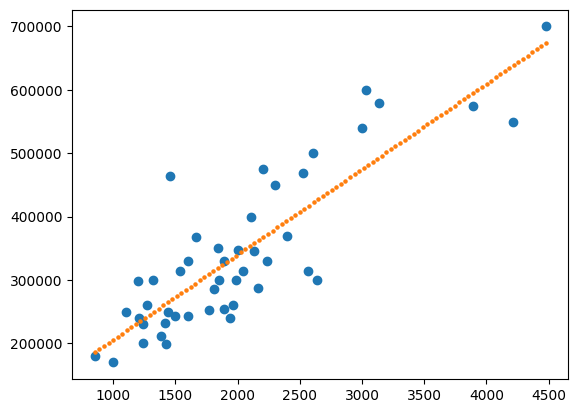

In [10]:
# Plot the data
plt.scatter(x_sqft, y_value)

# Sample the range from minimum to maximum sqft to get 100 points
sample_x = np.linspace(min(x_sqft), max(x_sqft), 100)
sample_y = mm*sample_x + bb

# Apply the best fit equation to each sample point and plot the result
plt.scatter(sample_x, sample_y, s = 5)

In [11]:
now = mm*1600 + bb

In [12]:
around = (x_sqft[abs(x_sqft - 1600) < 20], y_value[abs(x_sqft - 1600) < 20])
then = around[1][0]

In [13]:
then-now

43389.04719888477

1: Given these parameters, how much should a house with 1600 sqft cost?

> Answer: 286510.9528011152

2: From the dataset, how much did a house with 1600 sqft actually cost?

> Answer: 329900

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

> Answer: 43389.04719888477

Let's compare the $m$ and $b$ values that sklearn generated in the tutorial with the values that you found just now with your function. Hopefully they match.

In [14]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [18]:
import sklearn.linear_model as lm


# YOUR CODE HERE

def r2(x, y, mm, bb):
    y_pred = mm*x + bb
    ssr = np.sum(np.square(y - y_pred))
    sst = np.sum(np.square(y - y.mean()))
    return 1-ssr/sst

print(r2(x_sqft, y_value, mm, bb))

0.7310037839755306


Do 2 variables have to be very correlated to reduce their effectiveness together?

> Answer: No, high correlation is not the only way; introducing completely unrelated variables can also damage the predictive power, even if it isn't correlated to any other variable.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on `sklearn`'s breast cancer dataset. It is up to you to decide what features to get the best results.

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

X_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'] # <-- Define
Y_cols = ['target'] # <-- Define

# YOUR CODE HERE

In [62]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

(569, 9)

Test your logistic regression! You must get an accuracy of > 80%.

In [70]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
test_size = 0.20
X_train, X_val, y_train, y_val = train_test_split(data.data[..., 10:30], data.target, test_size=test_size, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100) # Do your variable names line up?

Training Accuracy is  95.82417582417582
Validation Accuracy is  95.6140350877193
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d32e568-365c-48d5-a586-2fcf756ec4ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>